Code based on termpaper 2019 by Ashesh and Anders Høst

In [249]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [251]:
# load data
df_insertion = pd.read_pickle(r"..\data\benchmark_results_insertion.pkl")
df_merge = pd.read_pickle(r"..\data\benchmark_results_mergesort.pkl")
df_combined = pd.read_pickle(r"..\data\benchmark_results_combined_n100.pkl")

In [252]:
sns.set(rc={"figure.figsize":(84/25.4,84/25.4)})
sns.set_style("whitegrid")

In [253]:
sns.set(style="whitegrid", rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=0.9) 
color = sns.color_palette("Set2", 6)

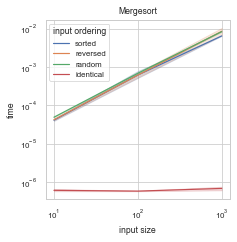

In [254]:
fig_merge = sns.lineplot(x="input size", y="time", data=df_merge, 
                         hue="input ordering")
plt.xscale("log")
plt.yscale("log")
plt.title('Mergesort')
fig_merge = fig_merge.get_figure()
#fig_merge.savefig("Mergesort.pdf")

In [255]:
# Concatenate

frames = [df_merge, df_combined, df_insertion]
df_all = pd.concat(frames, axis=0)

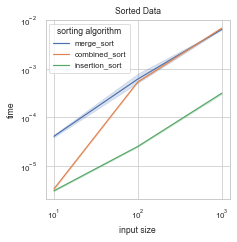

In [256]:
# Plot sorted

df_all_sorted = df_all[df_all["input ordering"] == "sorted"]
fig_sorted = sns.lineplot(x="input size", y='time', hue="sorting algorithm",
                         data=df_all_sorted)
plt.title("Sorted Data")
plt.xscale("log")
plt.yscale("log")
fig_sorted = fig_sorted.get_figure()
# fig_sorted.savefig("sorted_plot1000.pdf")

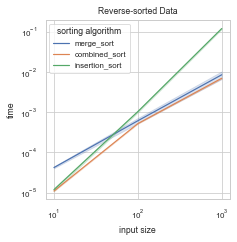

In [257]:
# Plot reversed

df_all_reversed = df_all[df_all["input ordering"] == "reversed"]
fig_reversed = sns.lineplot(x="input size", y='time', 
                            hue="sorting algorithm",
                            data=df_all_reversed)
plt.title("Reverse-sorted Data")
plt.xscale("log")
plt.yscale("log")
fig_reversed = fig_reversed.get_figure()
# fig_reversed.savefig("reversed_plot1000.pdf")

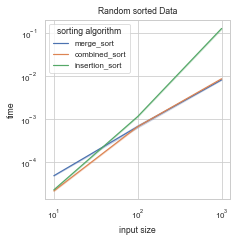

In [258]:
# Plot random

df_all_random = df_all[df_all["input ordering"] == "random"]
fig_random = sns.lineplot(x="input size", y='time', 
                            hue="sorting algorithm",
                            data=df_all_random)
plt.title("Random sorted Data")
plt.xscale("log")
plt.yscale("log")
fig_random = fig_random.get_figure()
# fig_random.savefig("random_plot1000.pdf")

# Functions for plotting for all datasets

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# pd.options.display.max_columns = 55
# pd.set_option('display.max_rows', 999)

In [3]:
import os
data = os.listdir('../data')

In [22]:
new_list=[]

for strg in data:
    if not strg.find('10^') == -1:
        new_list.append(strg)
new_list

['bubble_sort_n10^4.pkl',
 'combined_sort_n10^6.pkl',
 'insertion_sort_n10^4.pkl',
 'insertion_sort_n10^5.pkl',
 'insertion_sort_n10^8.pkl',
 'merge_sort_n10^6.pkl',
 'quick_sort_n10^6.pkl',
 'sorted_n10^6.pkl',
 'sorted_n10^8.pkl',
 'sort_n10^6.pkl',
 'sort_n10^8.pkl']

In [23]:
data_order_1 = '10^8'
data_order_2 = '10^6'
data_order_3 = '10^5'
data_order_4 = '10^4'
data_order = '2^16'

In [32]:
df_insertion = pd.read_pickle(r"..\data\insertion_sort_n"+ data_order_4 +".pkl")
df_bubble = pd.read_pickle(r"..\data\bubble_sort_n"+ data_order_4 +".pkl")
df_merge = pd.read_pickle(r"..\data\merge_sort_n"+ data_order_2 +".pkl")
df_quick = pd.read_pickle(r"..\data\quick_sort_n"+ data_order_2 +".pkl")
df_combined = pd.read_pickle(r"..\data\combined_sort_n"+ data_order_2 +".pkl")
df_python_sort = pd.read_pickle(r"..\data\sorted_n"+ data_order_1 +".pkl")
df_np_sort = pd.read_pickle(r"..\data\sort_n"+ data_order_1 +".pkl")


In [33]:
frames = [df_insertion, df_bubble, df_merge, df_quick, df_combined, df_python_sort, df_np_sort]

# Concatenating all benchmarking dataframes into one
df_all_frames = pd.concat(frames, axis=0, ignore_index=True)

In [34]:
df_all_frames.shape

(705, 5)

In [35]:
# Renaimg a couple of column titles to nice names for title in Plots
df_all_frames.rename(columns= {'sorting algorithm' : 'Sorting Algorithm', 'time': 'Time' }, inplace= True)
df_all_frames.head(1)

,input order,input size,run number,Sorting Algorithm,Time
0,sorted,1,1,insertion_sort,5.508552e-07


In [36]:
# Replacing Algorithm names to nice names for Legend in Plots

sorting_algorithm = {
    'Insertion Sort': 'insertion_sort',
    'Bubble Sort': 'bubble_sort',
    'Merge Sort': 'merge_sort',
    'Quick Sort': 'quick_sort',
    'Combined Sort': 'combined_sort',
    'Python Built-in Sort': 'sorted',
    'NumPy Sort': 'sort'
}
input_ordering = {
    'Sorted Data': 'sorted',
    'Reverse Sorted Data': 'reversed',
    'Random Data': 'random',
#     'Identical Data': 'identical'
}

for title, listed in sorting_algorithm.items():
    df_all_frames['Sorting Algorithm'] = df_all_frames['Sorting Algorithm'].str.replace(listed,title)

for title, listed in input_ordering.items():
    df_all_frames['input order'] = df_all_frames['input order'].str.replace(listed,title)
    
df_all_frames.head(1)

,input order,input size,run number,Sorting Algorithm,Time
0,Sorted Data,1,1,Insertion Sort,5.508552e-07


In [37]:
df_all_frames[df_all_frames["input order"] == 'Identical Data']


,input order,input size,run number,Sorting Algorithm,Time


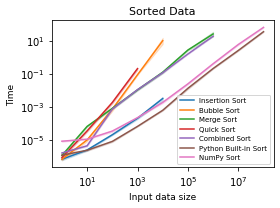

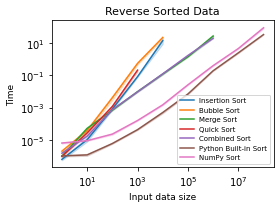

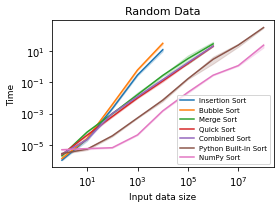

In [38]:
# Plot Categories
input_ordering = {
    'Sorted Data': 'sorted',
    'Reverse Sorted Data': 'reversed',
    'Random Data': 'random',
#     'Identical Data': 'identical'
}

labels_size = '9'
title_size = '11'
legend_size = '7'

for title, order in input_ordering.items():
    df_order_temp = df_all_frames[df_all_frames["input order"] == title]
    plt.figure(figsize=(4, 3))

    fig = sns.lineplot(x="input size",
                       y='Time',
                       hue="Sorting Algorithm",
                       data=df_order_temp)
    plt.title(title, fontsize=title_size)
    plt.xlabel('Input data size', fontsize=labels_size)
    plt.ylabel('Time', fontsize=labels_size)
    plt.legend(fontsize=legend_size, loc=4)
    plt.grid(False)
    plt.xscale("log")
    plt.yscale("log")
    plt.tight_layout()
    fig = fig.get_figure()
    fig.savefig('plots/'+title+'.pdf')
    plt.show()

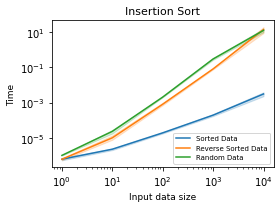

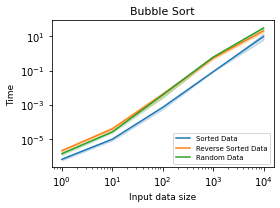

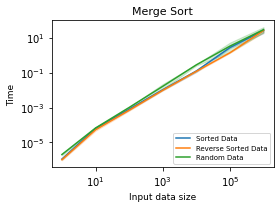

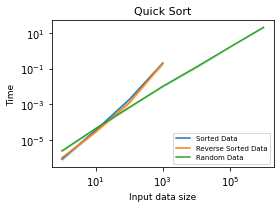

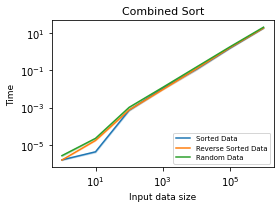

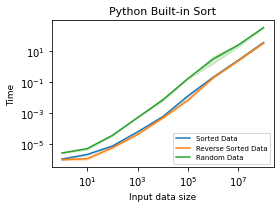

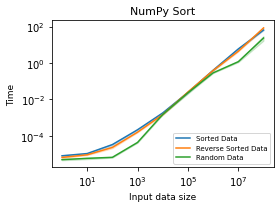

In [39]:
# Plot Categories
sorting_algorithm = {
    'Insertion Sort': 'insertion_sort',
    'Bubble Sort': 'bubble_sort',
    'Merge Sort': 'merge_sort',
    'Quick Sort': 'quick_sort',
    'Combined Sort': 'combined_sort',
    'Python Built-in Sort': 'sorted',
    'NumPy Sort': 'sort'
}

labels_size = '9'
title_size = '11'
legend_size = '7'

for title, sort_func in sorting_algorithm.items():
    df_order_temp = df_all_frames[df_all_frames["Sorting Algorithm"] == title]
    plt.figure(figsize=(4, 3))

    fig = sns.lineplot(x="input size",
                       y='Time',
                       hue="input order",
                       data=df_order_temp)
    plt.title(title, fontsize=title_size)
    plt.xlabel('Input data size', fontsize=labels_size)
    plt.ylabel('Time', fontsize=labels_size)
    plt.legend(fontsize=legend_size, loc=4)
    plt.grid(False)
    plt.xscale("log")
    plt.yscale("log")
    plt.tight_layout()
    fig = fig.get_figure()
    fig.savefig('plots/'+title+'.pdf')
    plt.show()